## ML Model

In [1]:
from action.core import load_action
from preprocessor.features import *
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import json
import numpy as np

In [2]:
PATH = "data/actions/"
X = []
y = []
gameids = ["0021500149", "0021500197", "0021500270", "0021500316",
           "0021500350", "0021500428", "0021500476", "0021500582"]
dtw = []
dist = []
entp = []

In [3]:
_0021500149 = json.load(open(PATH + gameids[0] + ".json"))
_0021500197 = json.load(open(PATH + gameids[1] + ".json"))
_0021500270 = json.load(open(PATH + gameids[2] + ".json"))
_0021500316 = json.load(open(PATH + gameids[3] + ".json"))
_0021500350 = json.load(open(PATH + gameids[4] + ".json"))
_0021500428 = json.load(open(PATH + gameids[5] + ".json"))
_0021500476 = json.load(open(PATH + gameids[6] + ".json"))
_0021500582 = json.load(open(PATH + gameids[7] + ".json")) 

In [4]:
ekeys = [_0021500149, _0021500197, _0021500270, _0021500316, _0021500350, _0021500428, _0021500476, _0021500582]

In [5]:
print "LOADING ACTIONS..."
for ekey in ekeys:
    for eid in sorted(ekey.keys()):
        try:
            gid = ekey[eid]['gameid']
            action = load_action(gid, eid)
            _dtw  = get_DTW(action)
            _dist = get_mean_distance(action)
            _entp = get_entropy(action)
            dtw.append(_dtw)
            dist.append(_dist)
            entp.append(_entp)
            X.append([_dtw, _entp])
            y.append(int(action.label))
        except Exception:
            print gid + " | " + str(eid)
X = np.matrix(X)
y = np.array(y)

LOADING ACTIONS...
0021500476 | 86
0021500582 | 407


ValueError: matrix must be 2-dimensional

In [48]:
zone_dtw = [dtw[index] for index, value in enumerate(y) if value == -1]
man_dtw = [dtw[index] for index, value in enumerate(y) if value == 1]

zone_dist = [dist[index] for index, value in enumerate(y) if value == -1]
man_dist = [dist[index] for index, value in enumerate(y) if value == 1]

zone_entp = [entp[index] for index, value in enumerate(y) if value == -1]
man_entp = [entp[index] for index, value in enumerate(y) if value == 1]

ValueError: x and y must have same first dimension

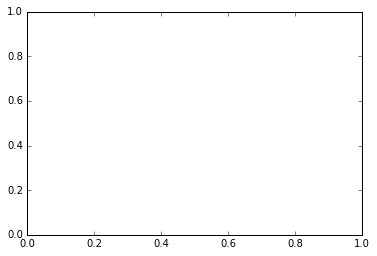

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(zone_entp, np.mean(zone_dist), 'ro')
plt.plot(man_entp, np.mean(man_dist), 'bo')
plt.show()

In [65]:
print "SPLITTING DATA..."
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

SPLITTING DATA...


In [66]:
print "BUILDING MODEL..."
clf = SVC()
clf.fit(X_train, y_train)
y_pred = [clf.predict(x) for x in X_test]

BUILDING MODEL...


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [20]:
print "SHOWING METRICS..."
print confusion_matrix(y_test, y_pred, labels=[-1, 1])
print clf.score(X_test, y_test)

SHOWING METRICS...
[[ 0 22]
 [ 0 22]]
0.5
